# Unsupervised Learning

The vast majority of data in unlabelled: we have the input features **X**, but we do not have the label **y**. Unsupervised learning algorithms exploits the unlabelled data.

**Clustering**:
The goal is to group similar instances into *clusters*.

**Anomaly Detection**:
The objective is to learn what *normal* data looks like, and then use that to detect abnormal instances, such as defective items on a production line or trend in a time series.

**Density Estimation**:
This is the task of estimating the *probability density function (PDF)* of the random process that generated teh dataset.

## Setup

In [74]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Clustering

In [75]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

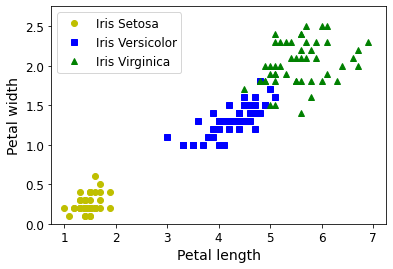

In [76]:
plt.axis([0.75, 7.25, 0, 2.75])
plt.plot(X[(y == 0), 2], X[(y == 0), 3], 'yo', label='Iris Setosa')
plt.plot(X[(y == 1), 2], X[(y == 1), 3], 'bs', label='Iris Versicolor')
plt.plot(X[(y == 2), 2], X[(y == 2), 3], 'g^', label='Iris Virginica')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left', fontsize=12)
plt.show()

A Gaussian mixture model (explained below) can actually separate these clusters pretty well (using all 4 features: petal length & width, and sepal length & width).

In [87]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)

gm.fit(X)
y_pred = gm.predict(X)

mapping = np.array([2, 0, 1])

y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

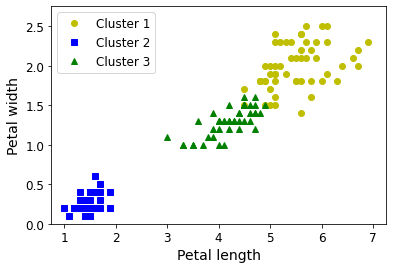

In [84]:
plt.axis([0.75, 7.25, 0, 2.75])
plt.plot(X[(y_pred == 0), 2], X[(y_pred == 0), 3], 'yo', label='Cluster 1')
plt.plot(X[(y_pred == 1), 2], X[(y_pred == 1), 3], 'bs', label='Cluster 2')
plt.plot(X[(y_pred == 2), 2], X[(y_pred == 2), 3], 'g^', label='Cluster 3')
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.legend(loc='upper left', fontsize=12)
plt.show()

In [86]:

np.sum(y_pred==y)

0